<a href="https://colab.research.google.com/github/kiyong21c/pytorch_tutorial/blob/main/20220803_linear_regression_batch_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import LabelEncoder # 레이블 인코더

fruits = ['사과', '블루베리', '바나나','귤','블루베리','바나나','바나나','사과']

In [2]:
# 레이블 인코더 생성
label_encoder = LabelEncoder()

In [3]:
# 레이블 인코딩 적용
label_encoder.fit(fruits)

LabelEncoder()

In [4]:
label_encoder.transform(fruits)

array([3, 2, 1, 0, 2, 1, 1, 3])

In [5]:
fruits_n = ['사과', '블루베리', '바나나','귤','블루베리','바나나','바나나']

# 레이블 인코딩 적용
fruits_label_encoded = label_encoder.transform(fruits_n)
fruits_label_encoded

array([3, 2, 1, 0, 2, 1, 1])

In [6]:
fruits_label_encoded = label_encoder.fit_transform(fruits)
fruits_label_encoded

array([3, 2, 1, 0, 2, 1, 1, 3])

In [7]:
from sklearn.preprocessing import OneHotEncoder # 원핫 인코더

# 레이블 인코더 생성
onehot_encoder = OneHotEncoder()

In [8]:
import numpy as np
fruits_onehot_encoded = onehot_encoder.fit_transform(np.array(fruits).reshape(-1, 1)) # 원핫 인코딩 적용시 (n,1) 배열 형태 변환 필요
fruits_onehot_encoded # 원-핫 인코딩은 대부분 값이 9인 희소행렬(메모리 낭비 심하다) → 압축된 형태인 CSR 행렬이 반환됨

<8x4 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [9]:
fruits_onehot_encoded.toarray() # CSR 형태의 행렬을 배열로 변환 : toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [10]:
# 판다스 함수 사용하여 원핫 인코딩
import pandas as pd

pd.get_dummies(fruits)

,귤,바나나,블루베리,사과
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1


# min-max 정규화 vs 표준화
- min-max 정규화 : 상한1, 하한0
- 표준화 : 상한/하한 없음, 평균0 분산1

# K-fold 교차검증

In [11]:
import numpy as np
from sklearn.model_selection import KFold

data = np.array([0,1,2,3,4,5,6,7,8,9])

folds =KFold(n_splits=5, shuffle=False)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련데이터 : {data[train_idx]}, 검증데이터 : {data[valid_idx]}')

훈련데이터 : [2 3 4 5 6 7 8 9], 검증데이터 : [0 1]
훈련데이터 : [0 1 4 5 6 7 8 9], 검증데이터 : [2 3]
훈련데이터 : [0 1 2 3 6 7 8 9], 검증데이터 : [4 5]
훈련데이터 : [0 1 2 3 4 5 8 9], 검증데이터 : [6 7]
훈련데이터 : [0 1 2 3 4 5 6 7], 검증데이터 : [8 9]


# 층화 K-fold 교차검증
 - 타깃값이 골고루 분포되게 폴드를 나누는 방법

In [12]:
y = np.array(['스팸']*5 + ['일반']*45)

folds = KFold(n_splits=5, shuffle=True)

for idx, (train_idx, valid_idx) in enumerate(folds.split(y)):
    print(f'Fold {idx+1} 검증 데이터 타깃값 :')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃값 :
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값 :
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값 :
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값 :
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값 :
['스팸' '스팸' '스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반'] 



 - 충분하지 않은 데이터의 K-Fold 교차검증 시 스팸이 하나도 없는 폴드가 생기게 됨

In [13]:
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50))                # 피처
y = np.array(['스팸']*5 + ['일반']*45) # 타깃값

folds = StratifiedKFold(n_splits=5)

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print(f'Fold {idx+1} 검증 데이터 타깃값 :')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃값 :
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값 :
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값 :
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값 :
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값 :
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



 - StratifiedKFold의 split()함수에는 피처와 타깃값 모두를 전달해야 함 : 타깃값을 파악해서 동일 한 비율로 나눠야 하기 때문

# 선형 회귀 모델

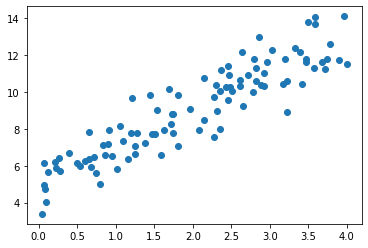

In [118]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # 시드값 고정

# 단순선형 회귀식 : y=2x+5

b = 5 # y절편
w = 2 # 가중치

noise = np.random.randn(100, 1) # 노이즈, 0~1실숫값 100개 생성

X = 4*np.random.rand(100, 1) # 0~4실숫값 100개 생성
y = w*X + b + noise

X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

plt.scatter(X, y);

In [119]:
import torch
from torch.utils.data import Dataset

class NewDataset(Dataset):
    # 초기화 메서드(생성자)
    def __init__(self, X, y):
        super().__init__()  # 상속받은 Dataset의 생성자 호출
        # 전달받은 인수들 저장
        self.X = X
        self.y = y

    # 데이터셋 크기 반환 메서드
    def __len__(self):
        return len(self.X)
    
    # 인덱스(idx)에 해당하는 데이터 반환 메서드
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [120]:
X[11]

tensor([2.3635])

In [121]:
dataset_train = NewDataset(X, y)
# dataset_valid = NewDataset(X, y)

In [179]:
from torch.utils.data import DataLoader # 데이터 로더 클래스

loader_train = DataLoader(dataset=dataset_train, batch_size=10, shuffle=True)
# loader_valid = DataLoader(dataset=dataset_valid, batch_size=10, shuffle=False)

In [180]:
import torch.nn as nn # 신경망 모듈
import torch.nn.functional as F # 신경망 모듈에서 자주 사용되는 함수를 모아둔 모듈
from sklearn.linear_model import LinearRegression

# 모델
W = torch.zeros(1, requires_grad = True) # W = 0 초기화
B = torch.zeros(1, requires_grad = True) # B = 0 초기화
outputs = X * W + B

# 손실함수
criterion = nn.CrossEntropyLoss()

# 옵티마이저
optimizer = torch.optim.SGD([W, B], lr = 0.1)

In [181]:
weight = optimizer.param_groups[0]['params'][0].item()
bias = optimizer.param_groups[0]['params'][1].item()

print( f'weight : {weight}, bias : {bias}')

weight : 0.0, bias : 0.0


에폭[1/1] - 손실값: 1.3800


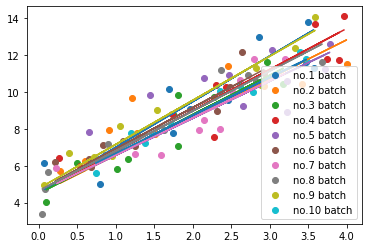

In [185]:
epochs = 1 # 총 에폭
# 총 에폭만큼 반복
for epoch in range(epochs):
    epoch_loss = 0  # 에폭별 손실값 초기화

    # '반복 횟수(Iterations)'만큼 반복
    for i, (X, y) in enumerate(loader_train): # 데이터 로더는 하나의 배치를 한 묶음으로 처리
    # 이미지, 레이블 데이터 미니배치를 장비에 할당
        # images = images.to(device)
        # labels = labels.to(device)


        # 옵티마이저 내 기울기 초기화(매 배치 마다)
        optimizer.zero_grad()
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = X * W + B
        # 손실 함수를 활용해 outputs(예측값)와 labels(실제값)의 손실값 계산
        loss = F.mse_loss(outputs, y)
        # 현재 배치(해당 Iteration)에서 손실 추가
        epoch_loss += loss.item()
        loss.backward() # 역전파 수행 : 기울기(.grad 속성)을 계산 후 저장
        # 가중치 갱신
        optimizer.step() # 새로운 가중치 = 기존 가중치 - (학습률 X 기울기)

        # 배치마다 사용된 데이터 시각화
        plt.scatter(X, y, label=f'no.{i+1} batch');
        plt.legend()
        # 배치 추가 학습 마다 수정된 가중치(W, B) 시각화
        weight = optimizer.param_groups[0]['params'][0].item() # weight는 scalar
        bias = optimizer.param_groups[0]['params'][1].item()   # bias는 scalar
        plt.plot(X, X*weight+bias)

    # 훈련 데이터 손실값 출력() : 하나의 에폭이 끝날때 마다
    print(f'에폭[{epoch+1}/{epochs}] - 손실값: {epoch_loss/len(loader_train):.4f}')